<a href="https://colab.research.google.com/github/woodstone10/data-intelligence-lab/blob/main/Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris classification

---

- **Logistic Regression** 
   : some regression algorithms can be used for classifica‐
   tion as well (and vice versa). Logistic Regression (also called Logit Regression) is com‐
   monly used to estimate the probability that an instance belongs to a particular class

- **Binary classifiers**
   If the estimated probability is
   greater than 50%, then the model predicts that the instance belongs to that class
   (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
   belongs to the negative class, labeled “0”). This makes it a binary classifier.
   Just like a Linear Regression model, a Logistic Regression
   model computes a weighted sum of the input features (plus a bias term), but instead
   of outputting the result directly like the Linear Regression model does, it outputs the
   logistic of this result
   Logistic Regression model prediction
   
   y = 0 if p < 0 . 5, 
     1 if p ≥ 0 . 5

- **Softmax Regression** (Multinomial Logistic Regression)
   : The Logistic Regression model can be generalized to support multiple classes directly,
   without having to train and combine multiple binary classifiers.
   This is called Softmax Regression, or Multinomial Logistic Regression.
   Let’s use Softmax Regression to classify the iris flowers into all three classes.
   Scikit Learn’s LogisticRegression uses one-versus-all by default when you train it on more
   than two classes, but you can set the multi_class hyperparameter to "multinomial"
   to switch it to Softmax Regression instead. You must also specify a solver that sup‐
   ports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documenta‐
   tion for more details). It also applies ℓ2 regularization by default, which you can
   control using the hyperparameter C.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris_flowers = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]

In [ ]:
iris = sklearn.datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [ ]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) #Binary classifiers: 1 if Iris-Virginica (2), else 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape, y_train.shape)
print(iris["target"])
print(y_train)

(120, 1) (120,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0]


## Classification with Logistic Regression (Simple Binary classifiers)

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm

In [ ]:
model = sklearn.linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

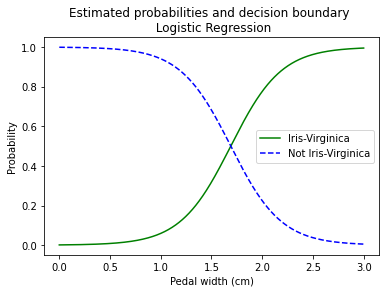

In [ ]:
X_test = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = model.predict_proba(X_test) # 1 if Iris-Virginica, else 0
plt.plot(X_test, y_prob[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_test, y_prob[:, 0], "b--", label="Not Iris-Virginica")
plt.title("Estimated probabilities and decision boundary \n Logistic Regression")
plt.xlabel("Pedal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Classification with Softmax Regression (Multinomial Logistic Regression)

In [ ]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"] # classfy 3 classes ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = sklearn.linear_model.LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

So the next time you find an iris with 5 cm long and 2 cm wide petals, you can ask
your model to tell you what type of iris it is, and it will answer Iris-Virginica (class 2)
with 94.2% probability (or Iris-Versicolor with 5.8% probability):

In [ ]:
y_prob = model.predict_proba(X_test)

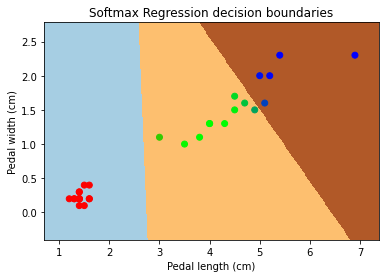

In [ ]:
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_test[:,0], X_test[:,1], c=y_prob, cmap=plt.cm.Paired)
plt.title("Softmax Regression decision boundaries")
plt.xlabel("Pedal length (cm)")
plt.ylabel("Pedal width (cm)")
plt.show()